In [1]:
%load_ext autoreload
%autoreload 1
#from support import *
%aimport support
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

# date_path = datetime.now().strftime("%Y/%m/%d/")  # Dynamické generování cesty podle aktuálního data
date_path = "2024/03/21/"
base_url = f"http://space.astro.cz/meteo/meteobox/meteobox_01/{date_path}"
print(base_url)  # Vypíše URL adresu, která bude použita pro stažení CSV souborů

csv_urls = support.fetch_csv_urls(base_url)
#print(csv_urls)  # Vypíše seznam URL adres CSV souborů, které budou staženy a sloučeny

combined_df = support.download_and_combine_csv(csv_urls)
print(combined_df.head())  # Zobrazí prvních několik řádků sloučené DataFrame

resampled_df = support.resample_sensor_data(combined_df)

pivot_df = support.pivot_sensor_data(resampled_df)


pivot_df.to_csv("combined_data_{}.csv".format(date_path.replace('/', '_')), index=True)


http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/


                         _time     _value _field   dataId
0  2024-03-20T23:50:05.130768Z  75.417716    hum  HYGRO01
1  2024-03-20T23:50:10.368581Z  75.480278    hum  HYGRO01
2  2024-03-20T23:50:15.610162Z  75.523003    hum  HYGRO01
3  2024-03-20T23:50:20.850855Z  75.632868    hum  HYGRO01
4  2024-03-20T23:50:26.093566Z  75.619135    hum  HYGRO01


Resampling data: 100%|██████████| 40/40 [00:15<00:00,  2.52it/s]


In [3]:
pivot_df

,_time,HYGRO01_hum,HYGRO01_temp,HYGRO02_hum,HYGRO02_temp,SEN54_hum,SEN54_mass_pm1,SEN54_mass_pm10,SEN54_mass_pm2-5,SEN54_mass_pm4,...,SPS30_2_mass_pm1,SPS30_2_mass_pm10,SPS30_2_mass_pm2-5,SPS30_2_mass_pm4,SPS30_2_number_pm0-5,SPS30_2_number_pm1,SPS30_2_number_pm10,SPS30_2_number_pm2-5,SPS30_2_number_pm4,SPS30_2_tps
0,2024-03-20 23:50:00+00:00,76.601173,6.235787,76.271739,6.271906,85.105317,26.885747,33.626471,30.621493,32.665385,...,27.721944,29.784791,29.553291,29.746206,186.222320,219.890264,221.380919,221.229067,221.333687,0.562190
1,2024-03-21 00:00:00+00:00,77.762184,5.963507,77.161983,6.044975,85.654574,28.176682,35.718386,32.304260,34.629148,...,29.133789,31.310866,31.063056,31.269561,195.695167,231.084015,232.656216,232.495693,232.606438,0.563449
2,2024-03-21 00:10:00+00:00,76.732963,6.251528,76.260067,6.304817,86.426471,27.463348,35.018778,31.580090,33.922172,...,28.373851,30.544425,30.278305,30.500069,190.529001,225.028942,226.591001,226.429523,226.541747,0.559272
3,2024-03-21 00:20:00+00:00,75.925466,6.349088,76.167244,6.260861,85.803878,26.231519,32.873243,29.906122,31.927891,...,26.797207,28.894303,28.619747,28.848541,179.884196,212.499135,214.003330,213.846003,213.956086,0.568413
4,2024-03-21 00:30:00+00:00,77.415891,6.177618,77.023987,6.223827,86.252393,23.985779,29.744695,27.206095,28.937472,...,24.659754,26.427764,26.254832,26.398939,165.734044,195.637460,196.922342,196.794113,196.881360,0.557348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2024-03-21 16:50:00+00:00,57.763253,14.068835,58.354361,13.824790,62.294876,16.120899,20.783820,18.639551,20.100449,...,15.392523,16.715029,16.499225,16.679060,103.182490,121.996940,122.933347,122.830918,122.904393,0.552777
103,2024-03-21 17:00:00+00:00,58.503639,13.855289,59.485476,13.503016,62.417815,15.192342,18.988514,17.297748,18.451351,...,14.487641,15.654273,15.489648,15.626834,97.212349,114.867630,115.701029,115.612611,115.674981,0.563249
104,2024-03-21 17:10:00+00:00,60.415179,13.345350,60.594454,13.261045,64.446727,16.335000,20.797273,18.771364,20.150909,...,15.319731,16.438616,16.321073,16.419024,102.936202,121.527480,122.338301,122.256541,122.312525,0.551574
105,2024-03-21 17:20:00+00:00,61.918916,13.120574,61.469645,13.212794,67.094208,20.583710,25.803846,23.471493,25.060860,...,18.892699,20.358192,20.171035,20.326997,126.838780,149.824278,150.876784,150.767196,150.843677,0.566154


In [4]:

unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

print(unique_temp_sensors)
print(unique_humidity_sensors)

['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']
['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']


HYGRO01
HYGRO02
SEN54
SEN54_2
HYGRO01
HYGRO02
SEN54
SEN54_2


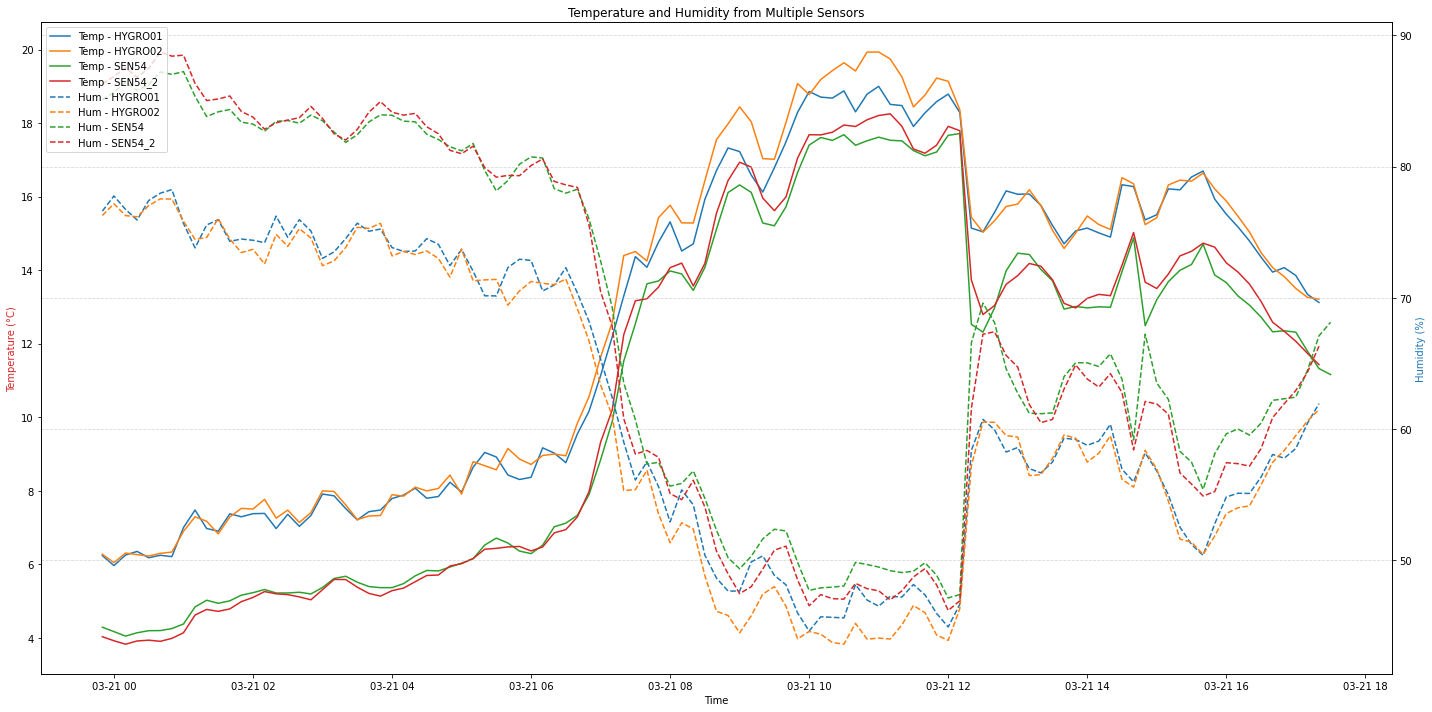

SEN54
SEN54_2
SPS30
SPS30_2


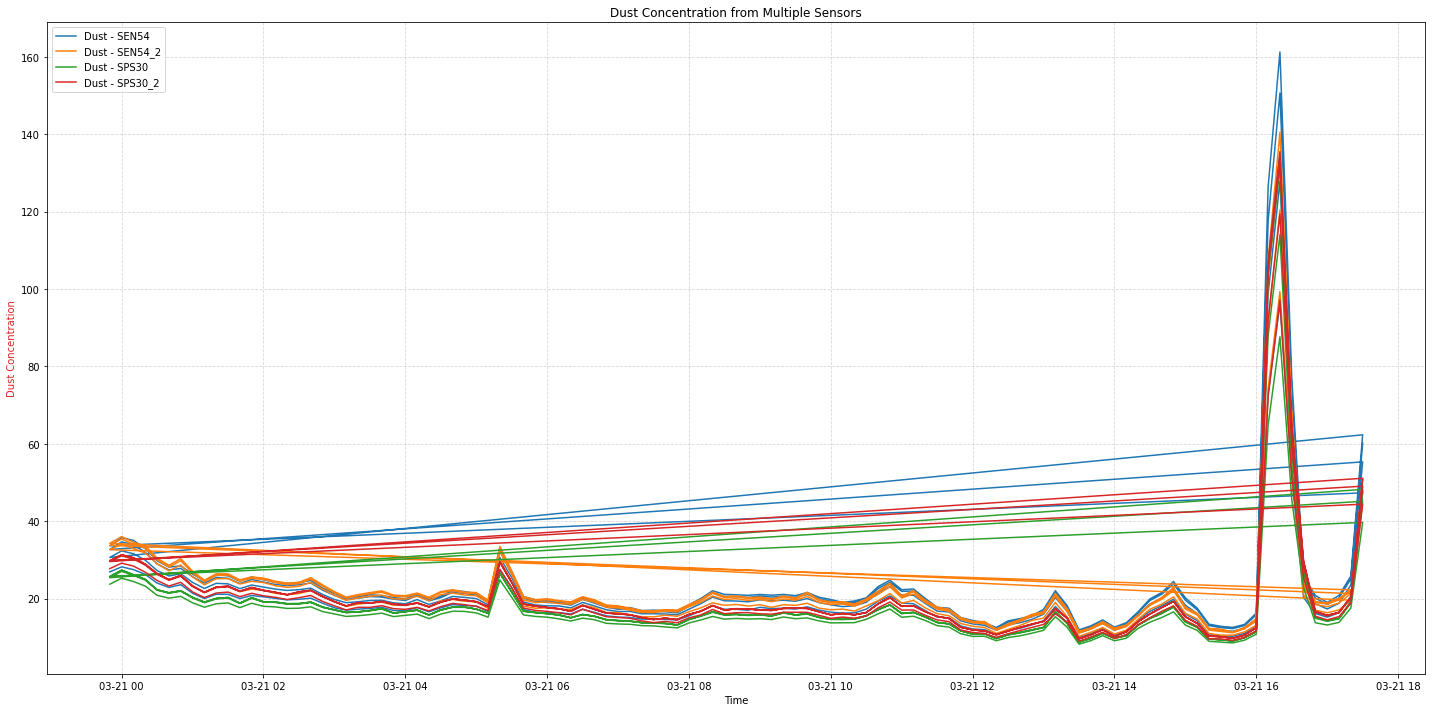

In [5]:
from matplotlib.dates import DateFormatter
import mpld3
# Extract unique sensors for temperature and humidity
unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

# Prepare data for temperature and humidity
temperature_data = resampled_df[resampled_df['_field'] == 'temp']
humidity_data = resampled_df[resampled_df['_field'] == 'hum']

# Plotting all sensor data on a single plot for comparison
fig, ax1 = plt.subplots(figsize=(20, 10))

# Temperature data
for sensor in unique_temp_sensors:
    print(sensor)
    sensor_data = temperature_data[temperature_data['dataId'] == sensor]
    ax1.plot(sensor_data['_time'], sensor_data['_value'], label=f'Temp - {sensor}')

# Humidity data
ax2 = ax1.twinx()
for sensor in unique_humidity_sensors:
    print(sensor)
    sensor_data = humidity_data[humidity_data['dataId'] == sensor]
    ax2.plot(sensor_data['_time'], sensor_data['_value'], linestyle='--', label=f'Hum - {sensor}')

# Labels, titles, and legend
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax2.set_ylabel('Humidity (%)', color='tab:blue')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Temperature and Humidity from Multiple Sensors')
plt.tight_layout()
plt.grid(True, 'both', 'both', linestyle='--', alpha=0.5)

plt.savefig("plot.png")
mpld3.save_html(fig, "interactive_plot.html")

plt.show()


# Extract unique sensors for dust
unique_dust_sensors = resampled_df[resampled_df['_field'].str.contains('mass_pm')]['dataId'].unique()

# Prepare data for dust
dust_data = resampled_df[resampled_df['_field'].str.contains('mass_pm')]

# Plotting all sensor data on a single plot for comparison
fig, ax1 = plt.subplots(figsize=(20, 10))

# Dust data
for sensor in unique_dust_sensors:
    print(sensor)
    sensor_data = dust_data[dust_data['dataId'] == sensor]
    ax1.plot(sensor_data['_time'], sensor_data['_value'], label=f'Dust - {sensor}')

# Labels, titles, and legend
ax1.set_xlabel('Time')
ax1.set_ylabel('Dust Concentration', color='tab:red')

ax1.legend(loc='upper left')

plt.title('Dust Concentration from Multiple Sensors')
plt.tight_layout()
plt.grid(True, 'both', 'both', linestyle='--', alpha=0.5)

plt.savefig("dust_plot.png")
mpld3.save_html(fig, "dust_interactive_plot.html")

plt.show()

